# Preprocessing and Data Wrangling

Importing fake and real news dataset

In [52]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

In [25]:
fake_news = pd.read_csv("datasets/fakeandreal/Fake.csv")
real_news = pd.read_csv("datasets/fakeandreal/True.csv")

We have 2 datasets of the same format: title, text, subject and date

In [26]:
fake_news.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [27]:
real_news.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


We perform some analysis and data visualization

In [28]:
rowFake, colFake = fake_news.shape
print ("[FAKE NEWS] \t", "Rows: ",rowFake,"\t","Columns: ", colFake)

[FAKE NEWS] 	 Rows:  23481 	 Columns:  4


In [29]:
rowReal, colReal = real_news.shape
print ("[REAL NEWS] \t","Rows: ",rowReal,"\t","Columns: ", colReal)

[REAL NEWS] 	 Rows:  21417 	 Columns:  4


In [30]:
fake_news["subject"].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [31]:
totalFreq = sum(fake_news["subject"].value_counts().values)
print(totalFreq, "total frequencies over", rowFake)

23481 total frequencies over 23481


In [32]:
real_news["subject"].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [33]:
totalFreq = sum(real_news["subject"].value_counts().values)
print(totalFreq, "total frequencies over", rowReal)

21417 total frequencies over 21417


The count of frequencies reveals that subject is not really an informative value, especially for real news dataset

In [78]:
fake_years = []
counter = 1
errorsPosition = []
errors = []

for day in fake_news["date"]:
    try:
      fake_years.append(int(day.split(",")[1]))
    except:
      errors.append(day), errorsPosition.append(counter)
    counter = counter + 1
    
print(errors)
# We notice that in some cases there are some weird values in the dataset

['19-Feb-18', '19-Feb-18', '19-Feb-18', '18-Feb-18', '18-Feb-18', '18-Feb-18', '18-Feb-18', '18-Feb-18', '18-Feb-18', '18-Feb-18', '17-Feb-18', '17-Feb-18', '17-Feb-18', '17-Feb-18', '17-Feb-18', '17-Feb-18', '17-Feb-18', '16-Feb-18', '16-Feb-18', '16-Feb-18', '16-Feb-18', '16-Feb-18', '16-Feb-18', '16-Feb-18', '16-Feb-18', '15-Feb-18', '15-Feb-18', '15-Feb-18', '15-Feb-18', '15-Feb-18', '15-Feb-18', '15-Feb-18', '15-Feb-18', '15-Feb-18', '14-Feb-18', 'https://100percentfedup.com/served-roy-moore-vietnamletter-veteran-sets-record-straight-honorable-decent-respectable-patriotic-commander-soldier/', 'https://100percentfedup.com/video-hillary-asked-about-trump-i-just-want-to-eat-some-pie/', 'https://100percentfedup.com/12-yr-old-black-conservative-whose-video-to-obama-went-viral-do-you-really-love-america-receives-death-threats-from-left/', 'https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg', 'https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg', 'h

In [67]:
real_years = []

for day in real_news["date"]:
    try:
      real_years.append(int(day.split(",")[1]))
    except:
      print("Error: ", day)
    
# In this case there are no errors in the iteration

In [36]:
print("[FAKE]", "Min:", min(fake_years), " Max:", max(fake_years))

[FAKE] Min: 2015  Max: 2017


In [37]:
print("[REAL]", "Min:", min(real_years), " Max:", max(real_years))

[REAL] Min: 2016  Max: 2017


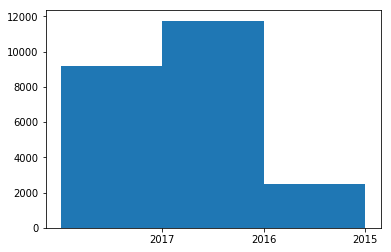

In [58]:
freqFake = Counter(fake_years)

labels, values = zip(*freqFake.items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [59]:
sum(freqFake.values()), len(fake_news["date"])

(23436, 23481)

In [62]:
len(fake_news["date"]) - sum(freqFake.values())

45

This is the number of formatting errors in fake news dataset

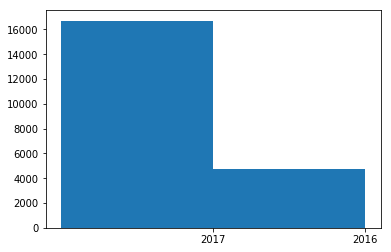

In [60]:
freqReal = Counter(real_years)

labels, values = zip(*freqReal.items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [61]:
sum(freqReal.values()), len(real_news["date"])

(21417, 21417)

After this first analysis, we can see that these errors must be corrected and put in a new dataset, for example in fake news dataset the formatting of some dates is done in a different way (e.g. 15-Feb-18)

To be honest, not all of these errors are due to formatting, in fact, we notice that

In [102]:
counter = 1

for i in errorsPosition:
    print(counter,": ",fake_news["date"][i])
    counter = counter + 1

1 :  19-Feb-18
2 :  19-Feb-18
3 :  18-Feb-18
4 :  18-Feb-18
5 :  18-Feb-18
6 :  18-Feb-18
7 :  18-Feb-18
8 :  18-Feb-18
9 :  18-Feb-18
10 :  17-Feb-18
11 :  17-Feb-18
12 :  17-Feb-18
13 :  17-Feb-18
14 :  17-Feb-18
15 :  17-Feb-18
16 :  17-Feb-18
17 :  16-Feb-18
18 :  16-Feb-18
19 :  16-Feb-18
20 :  16-Feb-18
21 :  16-Feb-18
22 :  16-Feb-18
23 :  16-Feb-18
24 :  16-Feb-18
25 :  15-Feb-18
26 :  15-Feb-18
27 :  15-Feb-18
28 :  15-Feb-18
29 :  15-Feb-18
30 :  15-Feb-18
31 :  15-Feb-18
32 :  15-Feb-18
33 :  15-Feb-18
34 :  14-Feb-18
35 :  Dec 31, 2017
36 :  Nov 25, 2017
37 :  https://100percentfedup.com/12-yr-old-black-conservative-whose-video-to-obama-went-viral-do-you-really-love-america-receives-death-threats-from-left/
38 :  Jul 3, 2015
39 :  https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg
40 :  Apr 12, 2015
41 :  https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg
42 :  Apr 12, 2015
43 :  Mar 22, 2017
44 :  https://fedup.wpengine.com/wp-content/upload

The data of case 37 can be retrieved by clicking the URL which replaced the value of the date (July 4th, 2015), while 39, 41 and 44 point the same resource which is no longer available (but the URL itself shows 2015 and 04, in this case we can choose whether write only the year or just remove the datum)